In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load audio files

pluck1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/FS/BS_1_EQ_1_FS_NO_1_10.wav')
pick1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/PK/BS_1_EQ_1_PK_NO_1_10.wav')
slap1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/ST/BS_1_EQ_1_ST_NO_1_10.wav')

In [3]:
# finds length of each signal array
maxlen = max((len(pluck1)), (len(pick1)), (len(slap1)))

# pads all signals to max length
pluck1_pad = np.pad(pluck1, (0, maxlen - len(pluck1)), 'constant', constant_values=0)
pick1_pad = np.pad(pick1, (0, maxlen - len(pick1)), 'constant', constant_values=0)
slap1_pad = np.pad(slap1, (0, maxlen - len(slap1)), 'constant', constant_values=0)

In [4]:
# Frame-length and hop-length

FL = 1024 # (frame-length)
HL = 512 # (hop-length)

In [5]:
# calculate rms-energy for each signal using librosa

rms_pluck1 = librosa.feature.rms(y=pluck1_pad, frame_length=FL, hop_length=HL)[0]
rms_pick1 = librosa.feature.rms(y=pick1_pad, frame_length=FL, hop_length=HL)[0]
rms_slap1 = librosa.feature.rms(y=slap1_pad, frame_length=FL, hop_length=HL)[0]

In [6]:
# calculate time of signals

frames = range(0, rms_pluck1.size)
t = librosa.frames_to_time(frames, hop_length=HL)

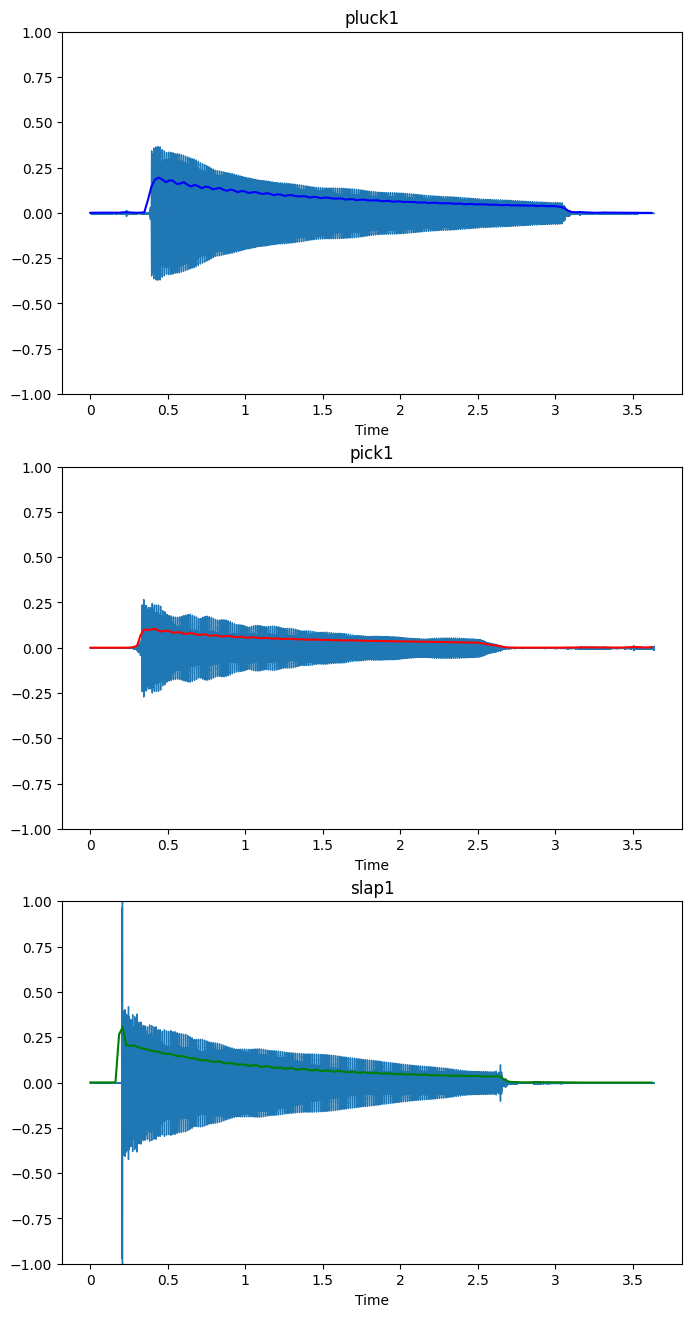

In [7]:
# plot RMS-energy

plt.figure(figsize=(8,16))

plt.subplot(3, 1, 1)
librosa.display.waveshow(pluck1_pad)
plt.plot(t, rms_pluck1, color="b")
plt.title("pluck1")
plt.ylim((-1,1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(pick1_pad)
plt.plot(t, rms_pick1, color="r")
plt.title("pick1")
plt.ylim((-1,1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(slap1_pad)
plt.plot(t, rms_slap1, color="g")
plt.title("slap1")
plt.ylim((-1,1))

plt.show()

In [9]:
# Function to extract RMS-Energy from scratch

def rms(signal, frame_length, hop_length):
    rms = []

    for i in range(0,len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2) / frame_length)  # calculates the sqrt of ((sum of each frame, squared), divided by frame length)
        rms.append(rms_current_frame)

    return np.array(rms)


In [10]:
# RMS-energy using home-made function

rms2_pluck1 = rms(pluck1_pad, FL, HL)
rms2_pick1 = rms(pick1_pad, FL, HL)
rms2_slap1 = rms(slap1_pad, FL, HL)

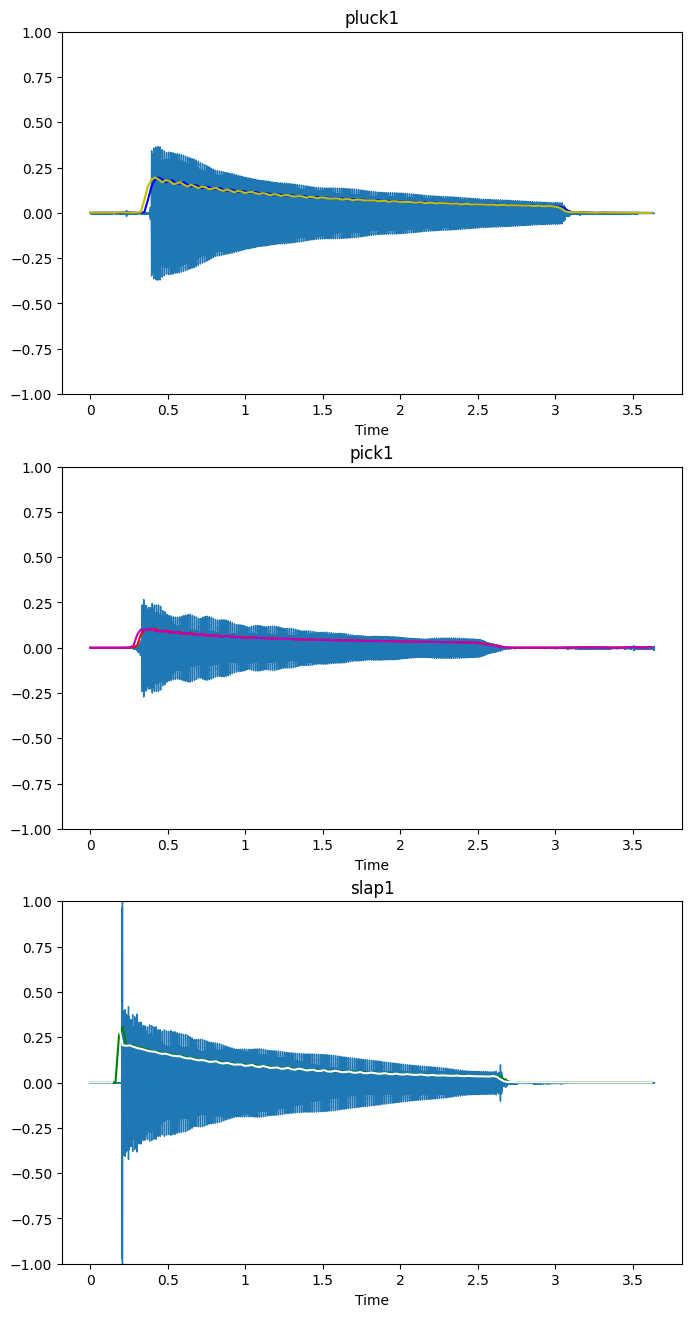

In [14]:
# compare librosa and home-made RMS values

plt.figure(figsize=(8,16))

plt.subplot(3, 1, 1)
librosa.display.waveshow(pluck1_pad)
plt.plot(t, rms_pluck1, color="b")
plt.plot(t, rms2_pluck1, color="y")
plt.title("pluck1")
plt.ylim((-1,1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(pick1_pad)
plt.plot(t, rms_pick1, color="r")
plt.plot(t, rms2_pick1, color="m")
plt.title("pick1")
plt.ylim((-1,1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(slap1_pad)
plt.plot(t, rms_slap1, color="g")
plt.plot(t, rms2_slap1, color="w")
plt.title("slap1")
plt.ylim((-1,1))

plt.show()